In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/recommendation-system/resize_image.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/selected_images_resize/0873045001.jpg  
  inflating: content/selected_images_resize/0906393003.jpg  
  inflating: content/selected_images_resize/0946387001.jpg  
  inflating: content/selected_images_resize/0922619001.jpg  
  inflating: content/selected_images_resize/0899795002.jpg  
  inflating: content/selected_images_resize/0897568001.jpg  
  inflating: content/selected_images_resize/0938190001.jpg  
  inflating: content/selected_images_resize/0917294004.jpg  
  inflating: content/selected_images_resize/0790820001.jpg  
  inflating: content/selected_images_resize/0879801001.jpg  
  inflating: content/selected_images_resize/0811899002.jpg  
  inflating: content/selected_images_resize/0883033001.jpg  
  inflating: content/selected_images_resize/0827635002.jpg  
  inflating: content/selected_images_resize/0686564013.jpg  
  inflating: content/selected_images_resize/0774113006.jpg  
  inflating: content/selected_imag

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/recommendation-system/full_csv_hnm_resize.csv')

# EDA

In [ ]:
df.shape

(129832, 36)

In [ ]:
df.head(10)

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,0,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,778745010,0.033881,2,778745,Fleur LL PJ (J),297,Pyjama set,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjamas in a printed cotton blend. Short-sleev...,NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
1,1,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,778745010,0.033881,2,778745,Fleur LL PJ (J),297,Pyjama set,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjamas in a printed cotton blend. Short-sleev...,NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
2,2,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,610776105,0.008458,2,610776,Tilly (1),255,T-shirt,...,Womens Everyday Basics,1002,Jersey Basic,T-shirt in lightweight jersey with a rounded h...,NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
3,3,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,929745001,0.050831,2,929745,LW (K) Rose consc rib cardi,245,Cardigan,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Cardigan in a soft rib knit containing some wo...,NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
4,4,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,536139068,0.016932,2,536139,Alex Jogger (J),296,Pyjama bottom,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in lightweight fabric with an e...,NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
5,5,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,536139068,0.016932,2,536139,Alex Jogger (J),296,Pyjama bottom,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear",Pyjama bottoms in lightweight fabric with an e...,NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
6,6,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,756322009,0.025407,2,756322,Lindsay N-slip (W),293,Night gown,...,"Womens Nightwear, Socks & Tigh",1017,"Under-, Nightwear","Short satin nightslip with lace at the top, a ...",NaN,NaN,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...
7,7,2020-09-15,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,763988003,0.025407,2,763988,DOMINIC SWEATPANT,272,Trousers,...,Men Underwear,1002,Jersey Basic,Sweatpants with an elasticated drawstring wais...,NaN,NaN,ACTIVE,NONE,47.0,f56e1891b914c344753965f18a664b9a77c78875248f0f...
8,8,2020-09-15,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,763988003,0.025407,2,763988,DOMINIC SWEATPANT,272,Trousers,...,Men Underwear,1002,Jersey Basic,Sweatpants with an elasticated drawstring wais...,NaN,NaN,ACTIVE,NONE,47.0,f56e1891b914c344753965f18a664b9a77c78875248f0f...
9,9,2020-09-15,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,903926001,0.050831,2,903926,Columbo Dress,254,Top,...,Womens Tailoring,1003,Knitwear,"V-neck dress in a soft, fine knit with dropped...",NaN,NaN,ACTIVE,NONE,47.0,f56e1891b914c344753965f18a664b9a77c78875248f0f...


In [ ]:
df.tail()

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,...,section_name,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
129827,129827,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,832505003,0.025407,2,832505,Hilly Rem Pad Soft Top,306,Bra,...,Womens Lingerie,1017,"Under-, Nightwear",V-neck bra top in microfibre with a lined fron...,1.0,1.0,ACTIVE,Regularly,30.0,f955b69d724775bc345946b292541cabf7caa613383c90...
129828,129828,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2,902288,Jones elastic waist,67,Belt,...,Womens Big accessories,1019,Accessories,Waist belt in imitation suede with elasticatio...,1.0,1.0,ACTIVE,Regularly,30.0,f955b69d724775bc345946b292541cabf7caa613383c90...
129829,129829,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2,856440,Cava Shirt dress,265,Dress,...,Divided Collection,1013,Dresses Ladies,Short dress in a softly draping weave with a c...,1.0,1.0,ACTIVE,Regularly,30.0,f955b69d724775bc345946b292541cabf7caa613383c90...
129830,129830,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,929511,POPPY PU SHIRT DRESS,265,Dress,...,Divided Collection,1013,Dresses Ladies,Short shirt dress in soft imitation leather wi...,1.0,1.0,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...
129831,129831,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2,891322,FENNEL SHIRT DRESS,-1,Unknown,...,Divided Collection,1013,Dresses Ladies,Short shirt dress in a cotton weave with a col...,1.0,1.0,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129832 entries, 0 to 129831
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    129832 non-null  int64  
 1   t_dat                         129832 non-null  object 
 2   customer_id                   129832 non-null  object 
 3   article_id                    129832 non-null  int64  
 4   price                         129832 non-null  float64
 5   sales_channel_id              129832 non-null  int64  
 6   product_code                  129832 non-null  int64  
 7   prod_name                     129832 non-null  object 
 8   product_type_no               129832 non-null  int64  
 9   product_type_name             129832 non-null  object 
 10  product_group_name            129832 non-null  object 
 11  graphical_appearance_no       129832 non-null  int64  
 12  graphical_appearance_name     129832 non-nul

In [ ]:
df.describe()

,Unnamed: 0,article_id,price,sales_channel_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_group_no,section_no,garment_group_no,FN,Active,age
count,129832.000000,1.298320e+05,129832.000000,129832.000000,129832.000000,129832.000000,1.298320e+05,129832.000000,129832.000000,129832.000000,129832.000000,129832.000000,129832.000000,129832.000000,55577.0,54601.0,129424.000000
mean,64915.500000,8.213541e+08,0.035086,1.816648,821354.064422,253.751379,1.010015e+06,22.684716,3.049017,7.128412,2495.518316,2.766799,32.804386,1009.054409,1.0,1.0,34.845036
std,37479.414412,1.290865e+08,0.020934,0.386957,129086.537886,58.616551,5.303560e+00,24.564914,1.342812,4.608116,1873.339850,5.691330,22.392067,5.989891,0.0,0.0,12.419657
min,0.000000,1.115650e+08,0.001102,1.000000,111565.000000,-1.000000,1.010001e+06,1.000000,1.000000,-1.000000,1201.000000,1.000000,2.000000,1001.000000,1.0,1.0,16.000000
25%,32457.750000,7.761790e+08,0.022017,2.000000,776179.000000,253.000000,1.010016e+06,9.000000,2.000000,5.000000,1543.000000,1.000000,15.000000,1003.000000,1.0,1.0,25.000000
50%,64915.500000,8.706110e+08,0.033881,2.000000,870611.000000,262.000000,1.010016e+06,10.000000,4.000000,5.000000,1660.000000,1.000000,19.000000,1009.000000,1.0,1.0,30.000000
75%,97373.250000,9.062260e+08,0.042356,2.000000,906226.000000,272.000000,1.010016e+06,19.000000,4.000000,11.000000,2031.000000,2.000000,53.000000,1013.000000,1.0,1.0,45.000000
max,129831.000000,9.562170e+08,0.422034,2.000000,956217.000000,532.000000,1.010028e+06,93.000000,7.000000,20.000000,9989.000000,26.000000,80.000000,1025.000000,1.0,1.0,91.000000


In [ ]:
df.columns

Index(['Unnamed: 0', 't_dat', 'customer_id', 'article_id', 'price',
       'sales_channel_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc', 'FN', 'Active',
       'club_member_status', 'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [ ]:
df["prod_name"].value_counts()

Lucy blouse                 1078
Pluto RW slacks (1)         1033
Jade HW Skinny Denim TRS     934
Ohlsson                      859
Lucien CONSCIOUS             838
                            ... 
Sidney deep V jumpsuit         5
Gigi                           5
MC Shihtzu Coat (Ester)        5
Dalila sweater                 5
Riga trousers                  5
Name: prod_name, Length: 3214, dtype: int64

In [ ]:
df["product_type_name"].value_counts()

Trousers              22227
Sweater               17475
Top                    9915
Dress                  9542
T-shirt                7620
                      ...  
Swimwear set              6
Cap                       5
Wedge                     5
Kids Underwear top        5
Costumes                  5
Name: product_type_name, Length: 82, dtype: int64

In [ ]:
df["product_group_name"].value_counts()

Garment Upper body    63832
Garment Lower body    31206
Garment Full body     10039
Underwear              9908
Accessories            4376
Socks & Tights         2954
Unknown                2254
Nightwear              1801
Shoes                  1698
Swimwear               1605
Items                   137
Bags                     22
Name: product_group_name, dtype: int64

In [ ]:
df["graphical_appearance_name"].value_counts()

Solid                  82511
Melange                11212
Denim                  10557
All over pattern        7654
Check                   3502
Stripe                  2262
Other structure         1948
Lace                    1838
Placement print         1686
Embroidery              1602
Treatment               1444
Jacquard                 693
Dot                      614
Front print              433
Colour blocking          354
Mesh                     352
Contrast                 255
Application/3D           242
Glittering/Metallic      220
Mixed solid/pattern      192
Other pattern             94
Metallic                  71
Transparent               31
Sequin                    23
Chambray                  19
Slub                      15
Neps                       8
Name: graphical_appearance_name, dtype: int64

In [ ]:
df["colour_group_name"].value_counts()

Black              51182
White              10320
Beige               8394
Light Beige         6219
Dark Grey           5029
Grey                4970
Blue                4887
Dark Blue           4563
Off White           4273
Light Pink          2534
Dark Green          2098
Pink                2043
Light Blue          2025
Greenish Khaki      1836
Green               1803
Light Grey          1708
Dark Red            1638
Light Orange        1511
Yellowish Brown     1335
Light Purple        1204
Dark Beige          1161
Dark Pink           1161
Orange              1034
Greyish Beige        808
Dark Orange          750
Red                  708
Gold                 677
Dark Purple          669
Purple               547
Yellow               479
Dark Turquoise       371
Dark Yellow          334
Light Turquoise      302
Light Green          272
Turquoise            251
Silver               245
Light Yellow         186
Other Purple         103
Other Orange          69
Other                 44


In [ ]:
df["perceived_colour_value_name"].value_counts()

Dark            65583
Dusty Light     26797
Medium Dusty    18993
Light           13770
Bright           2672
Medium           1973
Undefined          44
Name: perceived_colour_value_name, dtype: int64

In [ ]:
df["perceived_colour_master_name"].value_counts()

Black           51413
White           15136
Blue            11554
Grey            11369
Beige            9930
Mole             5920
Pink             5511
Khaki green      3069
Green            3068
Orange           2595
Red              2343
Lilac Purple     2222
Brown            2174
Unknown          1100
Metal             922
Turquoise         790
Yellow            672
undefined          44
Name: perceived_colour_master_name, dtype: int64

In [ ]:
df["department_name"].value_counts()

Knitwear               13883
Blouse                  8520
Trouser                 8079
Jersey Basic            6714
Basic 1                 6284
                       ...  
Tops Girls                 5
Kids Girl Dresses          5
Tops Knitwear DS           5
Kids Girl Outdoor          5
Kids Girl Exclusive        5
Name: department_name, Length: 141, dtype: int64

In [ ]:
df["index_name"].value_counts()

Ladieswear                        62357
Divided                           33930
Lingeries/Tights                  14917
Sport                              7277
Menswear                           5992
Ladies Accessories                 4843
Baby Sizes 50-98                    289
Children Sizes 134-170              143
Children Sizes 92-140                77
Children Accessories, Swimwear        7
Name: index_name, dtype: int64

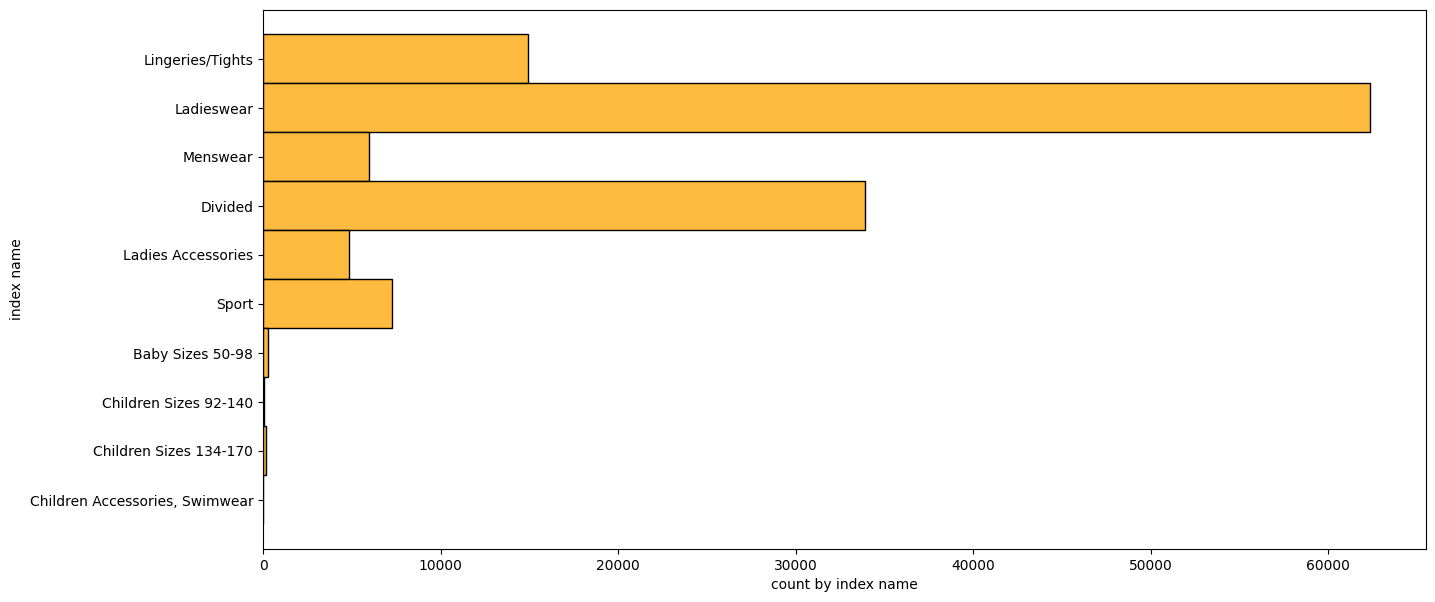

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=df, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

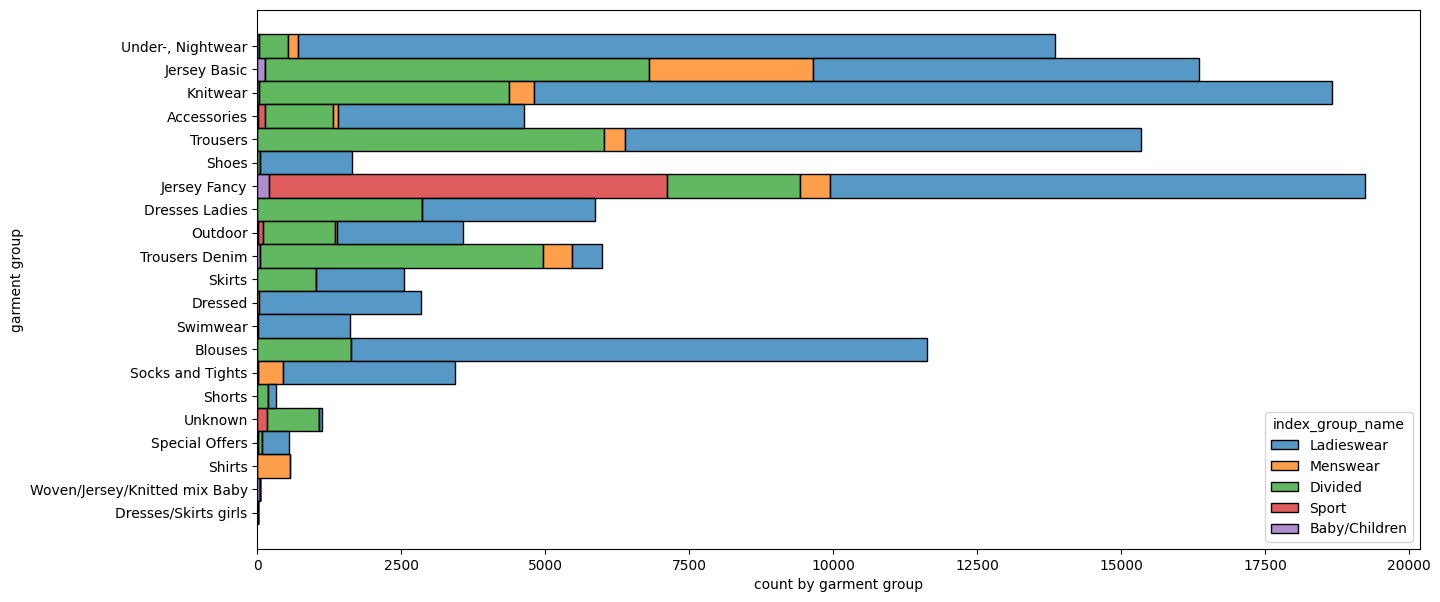

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=df, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

<Axes: >

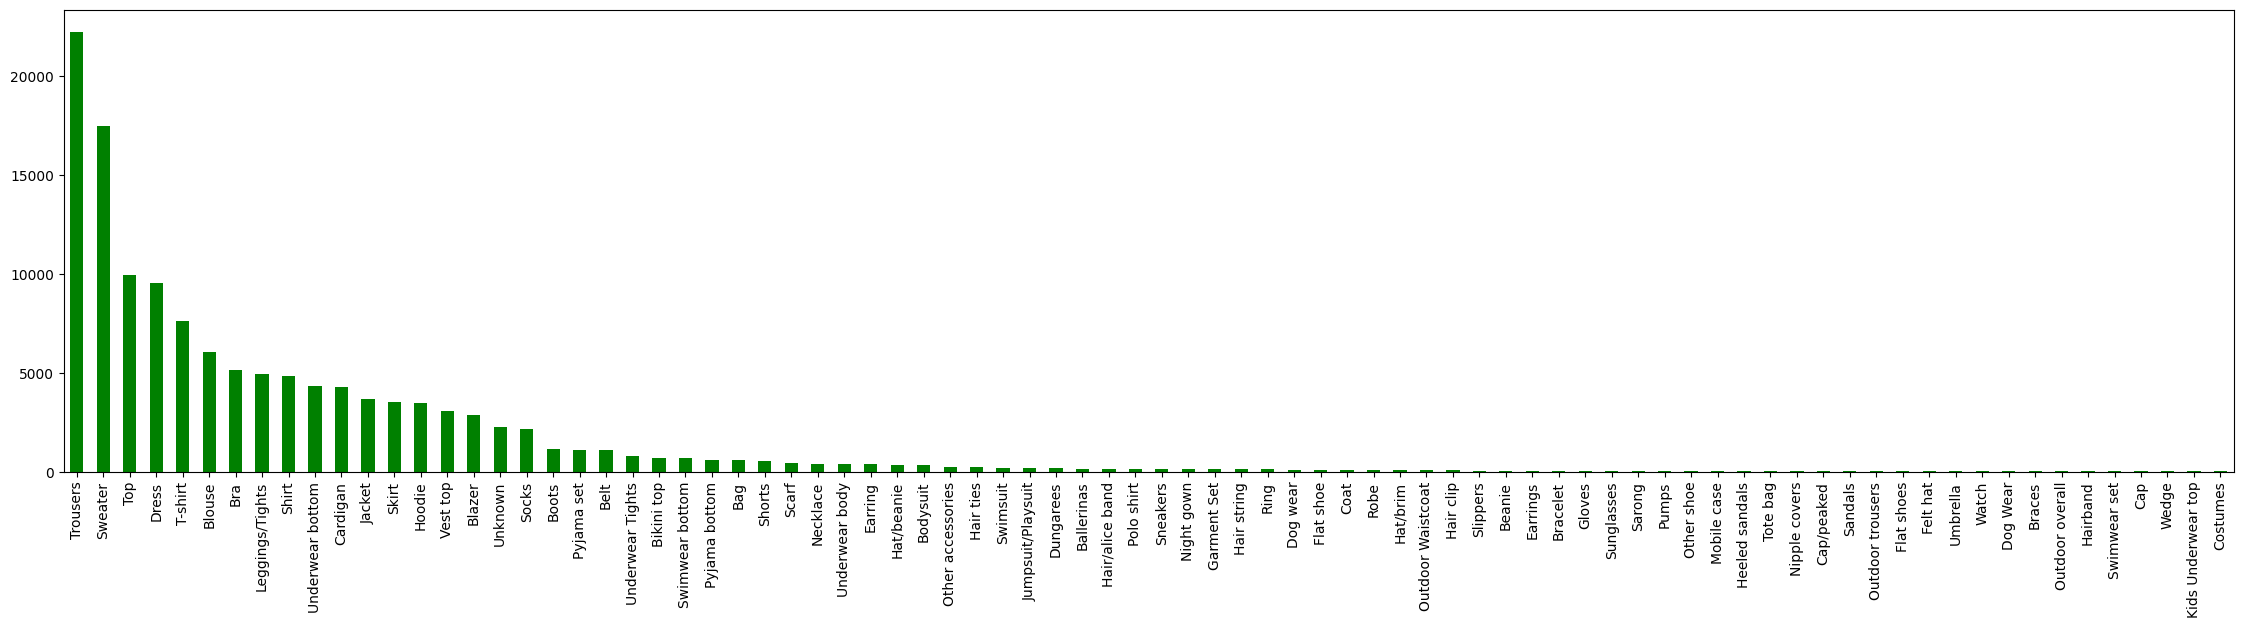

In [ ]:
df['product_type_name'].value_counts().plot(kind = 'bar', color = 'green', figsize = (28,6))

<Axes: >

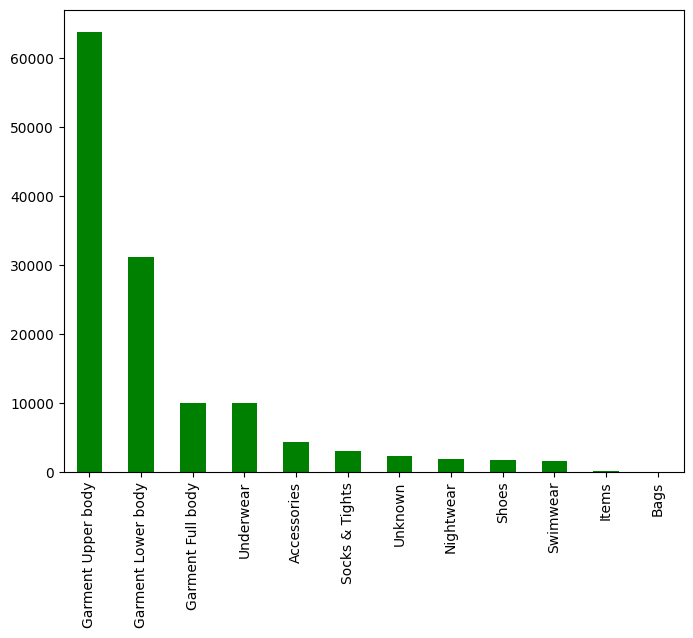

In [ ]:
df['product_group_name'].value_counts().plot(kind = 'bar', color = 'green', width = 0.5, figsize = (8,6))

<Axes: >

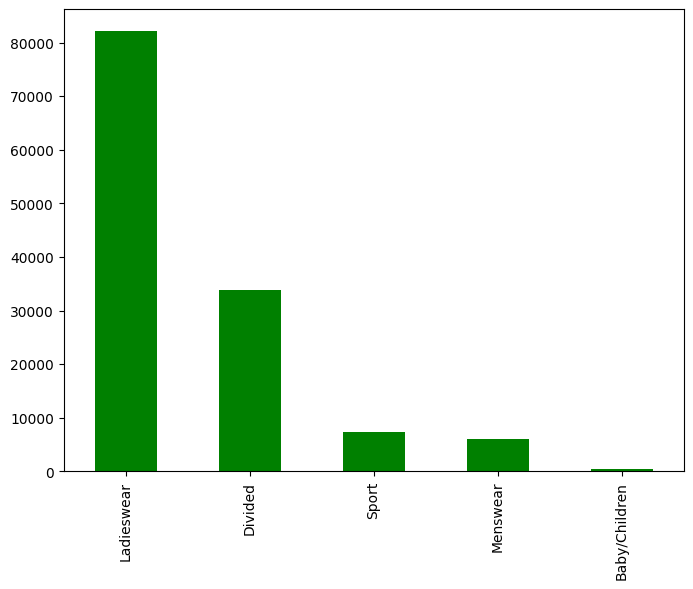

In [ ]:
df['index_group_name'].value_counts().plot(kind = 'bar', color = 'green', width = 0.5, figsize = (8,6))

<ipython-input-25-0923f9e97974>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(),rotation=90)


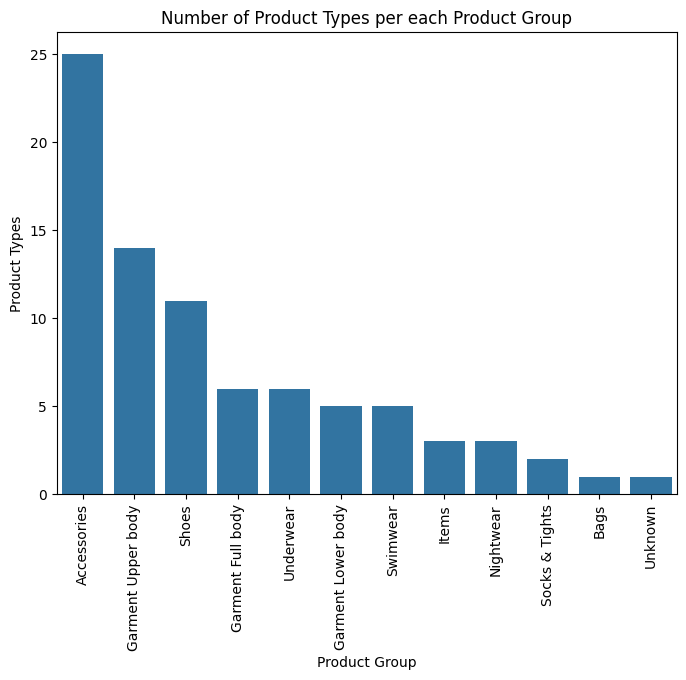

In [ ]:
temp = df.groupby(["product_group_name"])["product_type_name"].nunique()
prod = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
prod = prod.sort_values(['Product Types'], ascending = False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("muted")
s = sns.barplot(x = 'Product Group', y="Product Types", data=prod)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()


<ipython-input-26-ad1138f2641a>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


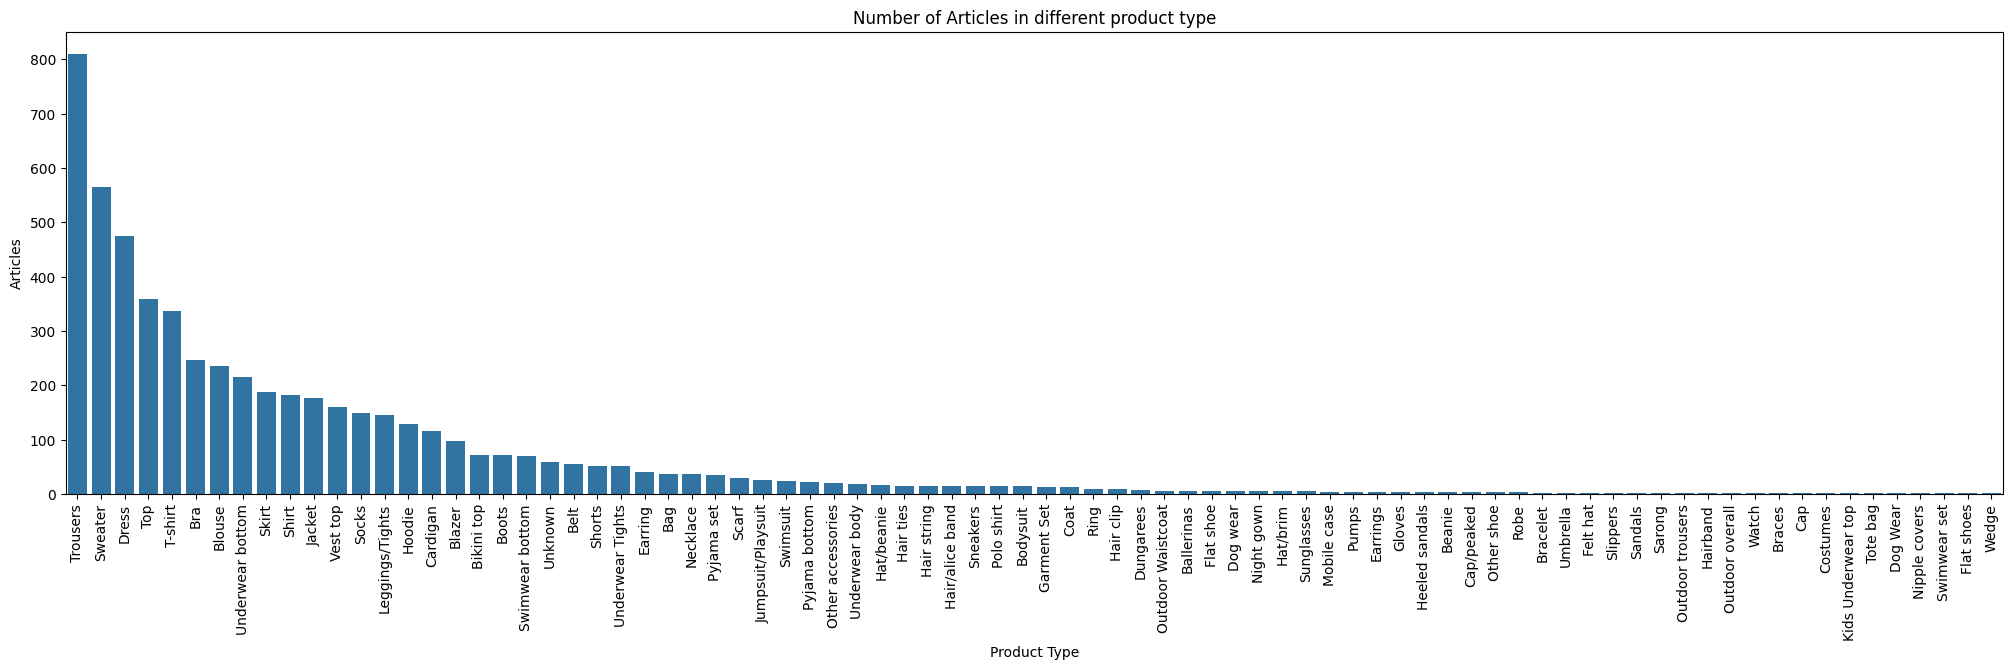

In [ ]:
temp = df.groupby(['product_type_name'])['article_id'].nunique()
type = pd.DataFrame({'Product Type': temp.index, 'Articles': temp.values})
type = type.sort_values(['Articles'], ascending = False)
plt.figure(figsize = (25,6))
plt.title("Number of Articles in different product type")
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y = 'Articles', data = type)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

<ipython-input-27-dbc4006bbaa9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


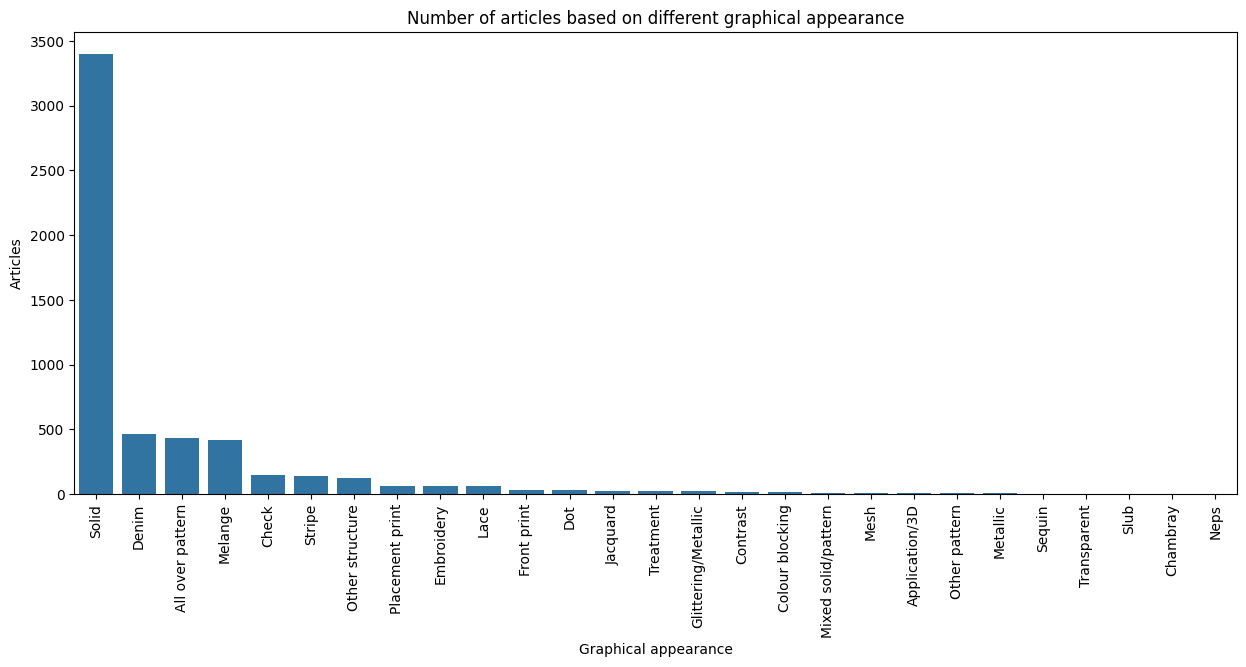

In [ ]:
temp = df.groupby(["graphical_appearance_name"])["article_id"].nunique()
graph = pd.DataFrame({"Graphical appearance": temp.index, "Articles": temp.values})
graph = graph.sort_values(["Articles"], ascending = False)
plt.figure(figsize = (15,6))
plt.title("Number of articles based on different graphical appearance")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Graphical appearance", y = "Articles", data = graph)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

In [ ]:
df.groupby(["index_group_name"])["article_id"].nunique().sort_values(ascending = False)

index_group_name
Ladieswear       3416
Divided          1348
Menswear          474
Sport             243
Baby/Children      71
Name: article_id, dtype: int64

<ipython-input-29-535de659d9fb>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  s.set_xticklabels(s.get_xticklabels(), rotation = 90)


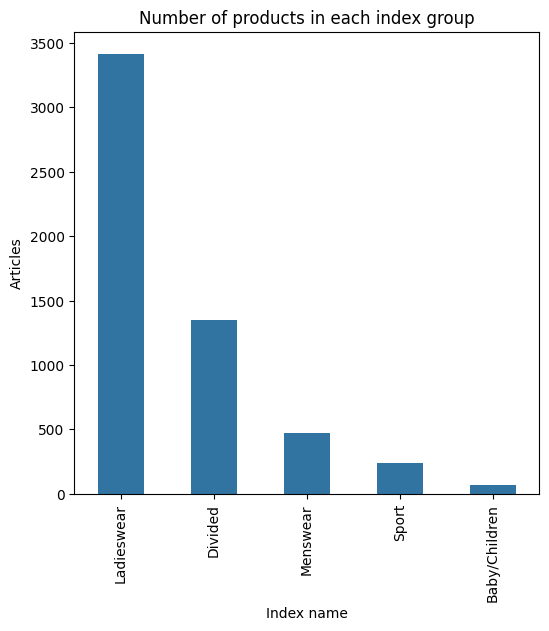

In [ ]:
temp = df.groupby(["index_group_name"])["article_id"].nunique()
idx = pd.DataFrame({"Index name": temp.index, "Articles": temp.values})
idx = idx.sort_values(["Articles"], ascending = False)
plt.figure(figsize=(6,6))
plt.title("Number of products in each index group")
sns.set_color_codes("pastel")
s = sns.barplot(x = "Index name", y = "Articles", width = 0.5, data = idx)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
locs, labels = plt.xticks()
plt.show()

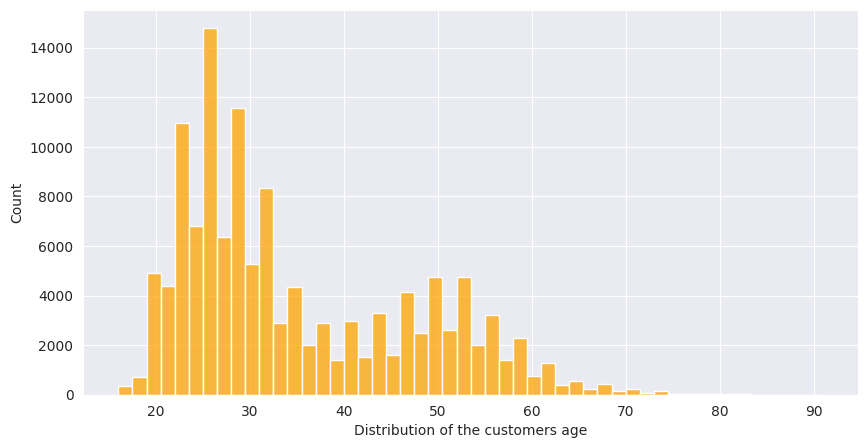

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=df, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

In [ ]:
transactions_byid = df.groupby('customer_id').count()

In [ ]:
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
3860b5e65d48bb509d89e6b21ec0458e13c75eab2e95f53ea2269fafc01a5567    103
e4ea6ece6706e9c119a3640e09e842f5ae7d62a6b546d4f2448e08def4bd7283     95
54e8ebd39543b5a4d69c3e7d79977558d2a606e6540ba0a50e07001cfff202c2     87
6e38d8f80e5c6d0db8d348a50c3c6ac29b17dfd3ac83d1b6bc33f090f8c03ab1     63
2df54f0d0653811fe06479c93905f3e6ecc6d07edf39d8b56e5b66c86182bedf     53
04a9eb567a036bd17e3346b32e8498205990a0fed6c1f9b737a48c2e34cd0711     51
d6646c1dfd83db7236fa4049c20d4eb24527be8342c6b84606f20861938139ad     51
b9300bd241818271d0b1aec5c77e920f3e189e92c11dd899259d9ba03fa79589     50
49501893c2f65bf0a0b585e5a1c7022dd5139232d00bc68a57376cb897284102     50
520167176b8acdbd365840dd64fb99ae92aafc03592f7931df67352f3a3e87c2     49
Name: price, dtype: int64

Berdasarkan hasil EDA, saran awal (cold start) untuk pengguna baru dapat difokuskan pada produk yang paling populer berdasarkan data. Produk ini termasuk:

Lucy blouse (produk dengan nama terbanyak)
Trouser (jenis produk dan artikel dalam jenis produk terbanyak)
Produk dengan penampilan grafis solid
Produk dengan kelompok warna dan nilai warna hitam dan gelap
Produk dari departemen knitwear dan indeks ladieswear
Produk dalam kelompok produk garmet upper body dan accessories
Selain itu, dapat menargetkan pengguna dengan usia sekitar 25-26 tahun karena distribusi usia pelanggan berada di sekitar rentang usia ini.

# Collaborative-based

## Preprocess

In [ ]:
df.drop(['sales_channel_id', 'price'], inplace=True, axis=1)
df['bought'] = 1
df["t_dat"] = pd.to_datetime(df["t_dat"])

In [ ]:
df["t_dat"].describe()

<ipython-input-34-c3e4d8c8717e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df["t_dat"].describe()


count                  129832
unique                      8
top       2020-09-17 00:00:00
freq                    19644
first     2020-09-15 00:00:00
last      2020-09-22 00:00:00
Name: t_dat, dtype: object

In [ ]:
start_date = datetime.datetime(2020,9,1)
transactions = df.loc[df["t_dat"] >= start_date]

article_bought_count = transactions[['article_id', 't_dat']].groupby('article_id').count().reset_index().rename(columns={'t_dat': 'count'})
most_bought_articles = article_bought_count[article_bought_count['count']>10]['article_id'].values
transactions = transactions[transactions['article_id'].isin(most_bought_articles)]

In [ ]:
transactions["t_dat"].describe()

<ipython-input-36-ec2073ece8e8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions["t_dat"].describe()


count                  112680
unique                      8
top       2020-09-17 00:00:00
freq                    17267
first     2020-09-15 00:00:00
last      2020-09-22 00:00:00
Name: t_dat, dtype: object

In [ ]:
np.random.seed(42)

negative_transactions = pd.DataFrame({
    'article_id': np.random.choice(transactions.article_id.unique(), transactions.shape[0]),
    'customer_id': np.random.choice(transactions.customer_id.unique(), transactions.shape[0]),
    'bought': np.zeros(transactions.shape[0])
})
positive_transactions = transactions[transactions['bought']==1]

## Train

In [ ]:
num_components = 1000

learning_rate = 0.001

lmbda = 0.1

n_epochs = 20

transactions = pd.concat([transactions, negative_transactions])
customers = transactions.customer_id.values
articles = transactions.article_id.values
bought = transactions.bought.values

customer_id2index = {c: i for i, c in enumerate(np.unique(customers))}
article_id2index = {a: i for i, a in enumerate(np.unique(articles))}

training_indices = None
customers_latent_matrix = None
articles_latent_matrix = None

n_samples = transactions.shape[0]

customers_latent_matrix = np.random.normal(scale=1., size=(len(np.unique(customers)), num_components))

articles_latent_matrix = np.random.normal(scale=1., size=(len(np.unique(articles)), num_components))

In [ ]:
for epoch in range(n_epochs):
    print('Epoch: {}'.format(epoch))
    training_indices = np.arange(n_samples)

    np.random.shuffle(training_indices)

    for idx in training_indices:

        customer_id = customers[idx]
        article_id = articles[idx]

        bought_val = bought[idx]

        customer_index = customer_id2index[customer_id]
        article_index = article_id2index[article_id]

        prediction = np.dot(customers_latent_matrix[customer_index], articles_latent_matrix[article_index])
        prediction = np.clip(prediction, 0, 1)
        error = (bought_val - prediction) # error

        customers_latent_matrix[customer_index] += learning_rate * \
                                (error * articles_latent_matrix[article_index] - \
                                 lmbda * customers_latent_matrix[customer_index])

        articles_latent_matrix[article_index] += learning_rate * \
                                (error * customers_latent_matrix[customer_index] - \
                                 lmbda * articles_latent_matrix[article_index])

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19


Dilakukan implementasi dari sistem rekomendasi berbasis Collaborative Filtering menggunakan metode Matrix Factorization. dengan langkah langkah:

Pertama, dilakukan pra-pemrosesan data dengan menghapus kolom ‘sales_channel_id’ dan ‘price’, menambahkan kolom ‘bought’, dan mengubah kolom ‘t_dat’ menjadi format datetime.

Selanjutnya, difilter transaksi yang terjadi setelah tanggal 1 September 2020 dan hanya mempertahankan artikel yang dibeli lebih dari 10 kali.

kemudian membuat transaksi negatif secara acak, yang mewakili pasangan pelanggan dan artikel di mana pelanggan tidak membeli artikel tersebut.

Setelah itu, menggabungkan transaksi positif dan negatif, dan memetakan setiap ID pelanggan dan artikel ke indeks yang unik.

Sleanjutnya diinisialisasi dua matriks laten: satu untuk pelanggan dan satu untuk artikel. Matriks-matriks ini akan merepresentasikan fitur laten dari pelanggan dan artikel.

terakhir, dilakukan pelatihan menggunakan Stochastic Gradient Descent (SGD) untuk memperbarui matriks laten berdasarkan error antara prediksi dan nilai sebenarnya.

In [ ]:
import pickle
np.save('customers_latent_matrix.npy', np.empty(5))

with open('articles_latent_matrix.pkl', 'wb') as file:
    pickle.dump(articles_latent_matrix, file)

In [ ]:
articles_latent_matrix = pickle.load(open('/content/articles_latent_matrix.pkl', 'rb'))

## Inference

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

customers_sub = pd.read_csv('/content/drive/MyDrive/recommendation-system/full_csv_hnm_resize.csv').customer_id.unique()

recommendations = []

def get_default_remommendations(positive_transactions):

    positive_transactions['pop_factor'] = positive_transactions['t_dat'].apply(lambda x: 1/(datetime.datetime(2020,9,23) - x).days)
    transactions_by_article = positive_transactions[['article_id', 'pop_factor']].groupby('article_id').sum().reset_index()

    default_recommendation = transactions_by_article.sort_values(by='pop_factor', ascending=False)['article_id'].values[:12]

    return default_recommendation

similarity_matrix = cosine_similarity(articles_latent_matrix, articles_latent_matrix, dense_output=False)

similarity_matrix = np.argsort(similarity_matrix, axis=1)
similarity_matrix = similarity_matrix[:, -12:]

transactions_by_customer = positive_transactions[['customer_id', 'article_id', 'bought']].groupby(['customer_id', 'article_id']).count().reset_index()

most_bought_article = transactions_by_customer.loc[transactions_by_customer.groupby('customer_id').bought.idxmax()]['article_id'].values

default_recommendation = get_default_remommendations(positive_transactions)

default_recommendation_count = 0
model_recommendation_count = 0

for customer in customers_sub:
    try:
        rec_1 = []
        rec_2 = []
        aux = []

        rec_2 =  default_recommendation

        user_most_bought_article_id = most_bought_article[customer_id2index[customer]]

        rec_1 = articles[similarity_matrix[article_id2index[user_most_bought_article_id]]]

        for rec_idx in range(6):
            aux.append(rec_2[rec_idx])
            aux.append(rec_1[rec_idx])

        recommendations.append(' '.join(aux))
        model_recommendation_count += 1
    except Exception as e:
        recommendations.append(' '.join(str(item) for item in default_recommendation))
        default_recommendation_count += 1

prediction_df =  pd.DataFrame({'customer_id': customers_sub, 'prediction': recommendations})

In [ ]:
prediction_df

,customer_id,prediction
0,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,924243002 923758001 915529005 751471001 448509...
1,00201f34c8c92683263346d78c2b45ffd0c6927229542d...,924243002 923758001 915529005 751471001 448509...
2,002e0b61a6fbc3425d76f3f222750f60165d44e2572267...,924243002 923758001 915529005 751471001 448509...
3,0039538fce4ca576d95df3315beb4844837a8701f341f3...,924243002 923758001 915529005 751471001 448509...
4,004d932f7a27ac3167c77db81d9cfd89392729e7f7e0d4...,924243002 923758001 915529005 751471001 448509...
...,...,...
17605,ff411f623177338bde6299009234da653cd417a6986780...,924243002 923758001 915529005 751471001 448509...
17606,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,924243002 923758001 915529005 751471001 448509...
17607,ff732b98019465f078144bae647d7d9765d76e3431ef92...,924243002 923758001 915529005 751471001 448509...
17608,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,924243002 923758001 915529005 751471001 448509...


In [ ]:
desired_customer_id = "0015f37f752a41a75c3be6f3f92deedc4c87d039f1758ec41f54f8c7f4729793"  # Replace with the customer_id you want to select

/content/content/selected_images_resize/0778745010.jpg
/content/content/selected_images_resize/0778745010.jpg
/content/content/selected_images_resize/0610776105.jpg
/content/content/selected_images_resize/0929745001.jpg
/content/content/selected_images_resize/0536139068.jpg
/content/content/selected_images_resize/0536139068.jpg
/content/content/selected_images_resize/0756322009.jpg
/content/content/selected_images_resize/0852442003.jpg
/content/content/selected_images_resize/0918171001.jpg


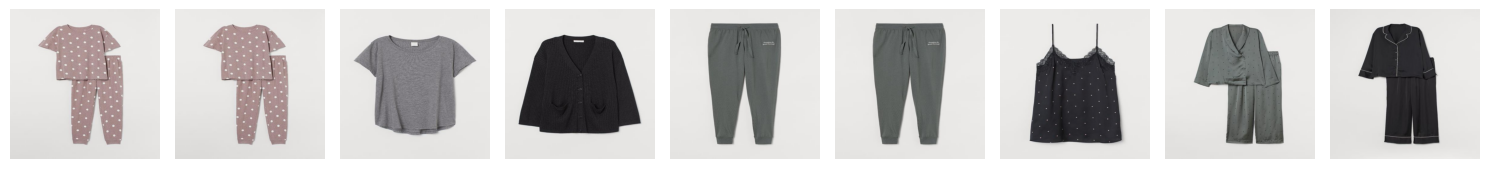

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


selected_row = df.loc[df['customer_id'] == desired_customer_id]

if not selected_row.empty:
    list_shop = selected_row['article_id'].values
    num_images = len(list_shop)

    rows = 1
    cols = num_images

    fig, axs = plt.subplots(rows, cols, figsize=(15, 5))

    for j, elem in enumerate(list_shop):
        image_path = f'/content/content/selected_images_resize/0{int(elem)}.jpg'
        print(image_path)

        try:
            img = mpimg.imread(image_path)

            axs[j].imshow(img)
            axs[j].axis('off')  # Turn off axis labels and ticks

        except Exception as e:
            print(f"Error loading image '{image_path}': {e}")

    plt.tight_layout()
    plt.show()

else:
    print(f"No data found for customer_id: {desired_customer_id}")

/content/content/selected_images_resize/0924243002.jpg
/content/content/selected_images_resize/0923758001.jpg
/content/content/selected_images_resize/0915529005.jpg
/content/content/selected_images_resize/0751471001.jpg
/content/content/selected_images_resize/0448509014.jpg
/content/content/selected_images_resize/0915529003.jpg
/content/content/selected_images_resize/0762846027.jpg
/content/content/selected_images_resize/0866731001.jpg
/content/content/selected_images_resize/0919273002.jpg
/content/content/selected_images_resize/0714790020.jpg
/content/content/selected_images_resize/0924243001.jpg
/content/content/selected_images_resize/0896169005.jpg


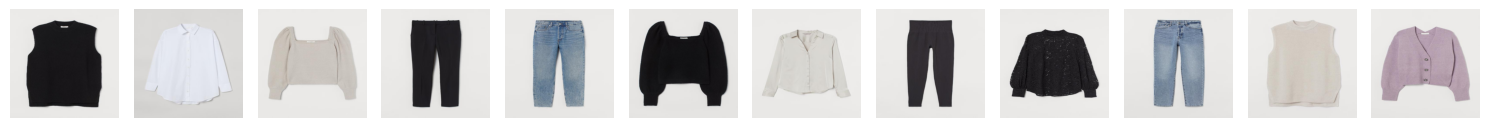

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

selected_row = prediction_df.loc[prediction_df['customer_id'] == desired_customer_id]

if not selected_row.empty:
    list_prediction = selected_row['prediction'].values[0]
    list_prediction_split = list_prediction.split(' ')
    num_images = len(list_prediction_split)

    rows = 1
    cols = num_images

    fig, axs = plt.subplots(rows, cols, figsize=(15, 5))

    for j, elem in enumerate(list_prediction_split):
        image_path = f'/content/content/selected_images_resize/0{int(elem)}.jpg'
        print(image_path)

        try:
            img = mpimg.imread(image_path)
            axs[j].imshow(img)
            axs[j].axis('off')  # Turn off axis labels and ticks

        except Exception as e:
            print(f"Error loading image '{image_path}': {e}")

    plt.tight_layout()
    plt.show()

else:
    print(f"No data found for customer_id: {desired_customer_id}")


# Content-based

## Preprocess

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/recommendation-system/full_csv_hnm_resize.csv')

In [ ]:
ohe_columns = ['product_group_name', 'graphical_appearance_no','perceived_colour_master_id', 'index_code', \
               'garment_group_no']
emb_columns = ['product_type_name', 'department_name', 'colour_group_name', 'section_name', 'detail_desc']

In [ ]:
df[['article_id']+emb_columns]

,article_id,product_type_name,department_name,colour_group_name,section_name,detail_desc
0,778745010,Pyjama set,Nightwear,Beige,"Womens Nightwear, Socks & Tigh",Pyjamas in a printed cotton blend. Short-sleev...
1,778745010,Pyjama set,Nightwear,Beige,"Womens Nightwear, Socks & Tigh",Pyjamas in a printed cotton blend. Short-sleev...
2,610776105,T-shirt,Jersey Basic,Grey,Womens Everyday Basics,T-shirt in lightweight jersey with a rounded h...
3,929745001,Cardigan,Loungewear,Black,"Womens Nightwear, Socks & Tigh",Cardigan in a soft rib knit containing some wo...
4,536139068,Pyjama bottom,Nightwear,Dark Green,"Womens Nightwear, Socks & Tigh",Pyjama bottoms in lightweight fabric with an e...
...,...,...,...,...,...,...
129827,832505003,Bra,Functional Lingerie,Yellowish Brown,Womens Lingerie,V-neck bra top in microfibre with a lined fron...
129828,902288001,Belt,Belts,Black,Womens Big accessories,Waist belt in imitation suede with elasticatio...
129829,856440002,Dress,Dresses,Dark Pink,Divided Collection,Short dress in a softly draping weave with a c...
129830,929511001,Dress,Dresses,Black,Divided Collection,Short shirt dress in soft imitation leather wi...


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(x):
    x = ' '+x+' '
    x = x.lower()

    x = re.sub(r'\d+\-\d+', ' ', x)
    x = re.sub(r'\d+\.\d+', ' ', x)
    x = re.sub(r'\d+/\d+', ' ', x)
    x = re.sub(r'\d+', ' ', x)
    x = re.sub(r'\(.+?\)', ' ', x)

    x = re.sub(r' cm ', ' ', x)
    x = re.sub(r' denier ', ' ', x)
    x = re.sub(r' t\-shirt ', ' tshirt ', x)
    x = re.sub(r'(\w+)(\+)', r'\1 plus', x)
    x = re.sub(r'[^a-z\s]', ' ', x)
    tokens = x.strip().split()
    stopwords_list = stopwords.words()
    tokens = ' '.join([lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_list])
    return tokens

In [ ]:
from tqdm import tqdm
tqdm.pandas()
df['desc_full'] = df['product_type_name']+' '+df['department_name']+' '\
                        +df['colour_group_name']+' '+df['section_name']+' '\
                        +df['detail_desc'].fillna(' ')
df['desc_full_prep'] = df['desc_full'].progress_apply(preprocess)

100%|██████████| 129832/129832 [13:24<00:00, 161.38it/s]


In [ ]:
texts = df['desc_full_prep'].unique().tolist()
with open('texts_normalized.txt', 'w') as f:
    for text in texts:
        f.write(text)
        f.write('\n')

In [ ]:
!pip install fasttext

In [ ]:
import fasttext
fasttext_model = fasttext.train_unsupervised('texts_normalized.txt', minn=2, maxn=5, dim=200)

In [ ]:
doc2vec_dict = {}
for idx, row in enumerate(df[['article_id', 'desc_full_prep']].itertuples()):
    key = f"{row[1]}_{idx}"  # Create a unique key using 'article_id' and index
    doc2vec_dict[key] = fasttext_model.get_sentence_vector(row[2])

In [ ]:
emb_features = np.array(list(doc2vec_dict.values()))
emb_features.shape

(129832, 200)

In [ ]:
df[['article_id']+ohe_columns]

,article_id,product_group_name,graphical_appearance_no,perceived_colour_master_id,index_code,garment_group_no
0,778745010,Nightwear,1010006,1,B,1017
1,778745010,Nightwear,1010006,1,B,1017
2,610776105,Garment Upper body,1010010,12,A,1002
3,929745001,Garment Upper body,1010010,12,A,1017
4,536139068,Nightwear,1010007,19,B,1017
...,...,...,...,...,...,...
129827,832505003,Underwear,1010016,13,B,1017
129828,902288001,Accessories,1010016,5,C,1019
129829,856440002,Garment Full body,1010016,4,D,1013
129830,929511001,Garment Full body,1010001,5,D,1013


In [ ]:
ohe_features = pd.get_dummies(df[ohe_columns].astype(str)).astype(int).values
ohe_features.shape

(129832, 88)

In [ ]:
articles_features = np.concatenate([emb_features, ohe_features], axis=1)
articles_features.shape

(129832, 288)

In [ ]:
articles_features_with_id = {}
for article_id, features in zip(df['article_id'].values, articles_features):
    articles_features_with_id[article_id] = features

In [ ]:
from datetime import datetime, timedelta
max_date = df['t_dat'].max()

end_train_date = datetime.strptime(max_date, '%Y-%M-%d') - timedelta(days=1)
end_train_date = end_train_date.strftime('%Y-%M-%d')
end_train_date

'2020-09-21'

In [ ]:
transactions_train = df[df['t_dat']<=end_train_date]
transactions_test = df[df['t_dat']>end_train_date]
transactions_train.shape, transactions_test.shape

((113723, 38), (16109, 38))

In [ ]:
articles_ids = pd.Series(list(articles_features_with_id.keys()))
def create_zero_target(transactions_df_grouped):
    cutomers_lst = []
    articles_lst = []
    for row in transactions_df_grouped[['customer_id', 'article_id']].itertuples():
        customer_id, article_ids = row[1], row[2]
        unord_article_id = articles_ids[~articles_ids.isin(article_ids)].sample(50)
        cutomers_lst.append(customer_id)
        articles_lst.append(unord_article_id)
    df_zero_target = pd.DataFrame({'customer_id':cutomers_lst, 'article_id':articles_lst, 'target':[0]*len(cutomers_lst)}).\
                                                                                            explode('article_id')
    return df_zero_target

In [ ]:
transactions_test['target'] = 1

<ipython-input-23-66a48c051894>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_test['target'] = 1


DIlakukan pemrosesan awal yaitu dengan pendefinisian kolom ohe dan emb yang akan digunakan untuk proses one hot dan embedding.

Selanjutnya pemrosesan dilakukan dengan membersihkan dan mempersiapkan teks untuk embeding. prosesnya adalah mengubah teks jadi huruf kecil, menghapus angka dan karakter khusus dan lemmatize.

Kemudian pembuatan embeding dengan fasttext untuk melatih model unsupervised pada teks yang sudah diproses sehingga menghasilkan vektor tiap kalimat. lalu fitur embedding dan one hot digabungkan jadi satu array.

Lalu data dibagi menjadi train dan test berdasarkan tanggal tertentu, serta dibuat target untuk model dengan menandai transaksi yang ada dengan 1 dan yang tidak ada (acak) 0.

In [ ]:
transactions_test_grouped = transactions_test.drop(['article_id'], axis=1).\
                                                    merge(df[['customer_id', 'article_id']], \
                                                    how='left', on='customer_id').\
                                                    groupby('customer_id')['article_id'].apply(lambda x: \
                                                                                        list(set(x))).reset_index()
zero_test_target = create_zero_target(transactions_test_grouped)
test = pd.concat([transactions_test, zero_test_target])[['customer_id', 'article_id', 'target']].\
                                                                    sort_values(by='customer_id').reset_index(drop=True)
test

,customer_id,article_id,target
0,0010e8eb18f131e724d6997909af0808adbba057529edb...,610776002,1
1,0010e8eb18f131e724d6997909af0808adbba057529edb...,863067003,0
2,0010e8eb18f131e724d6997909af0808adbba057529edb...,761269001,0
3,0010e8eb18f131e724d6997909af0808adbba057529edb...,923353003,0
4,0010e8eb18f131e724d6997909af0808adbba057529edb...,869379011,0
...,...,...,...
163204,fff2282977442e327b45d8c89afde25617d00124d0f999...,902400002,0
163205,fff2282977442e327b45d8c89afde25617d00124d0f999...,939503001,0
163206,fff2282977442e327b45d8c89afde25617d00124d0f999...,909916002,0
163207,fff2282977442e327b45d8c89afde25617d00124d0f999...,810170014,0


In [ ]:
df[['FN', 'Active']] = df[['FN', 'Active']].fillna(0).astype(int)
df[['club_member_status', 'fashion_news_frequency']] = df[['club_member_status', \
                                                                         'fashion_news_frequency']].fillna('NONE')

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())

bins = [16, 20, 25, 30, 40, 50, 60, 100]
labels = [1,2,3,4,5,6,7]
df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels)
df

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,...,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,desc_full,desc_full_prep,age_bins
0,0,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,778745010,0.033881,2,778745,Fleur LL PJ (J),297,Pyjama set,...,Pyjamas in a printed cotton blend. Short-sleev...,0,0,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...,"Pyjama set Nightwear Beige Womens Nightwear, S...",pyjama set nightwear beige woman nightwear soc...,3
1,1,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,778745010,0.033881,2,778745,Fleur LL PJ (J),297,Pyjama set,...,Pyjamas in a printed cotton blend. Short-sleev...,0,0,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...,"Pyjama set Nightwear Beige Womens Nightwear, S...",pyjama set nightwear beige woman nightwear soc...,3
2,2,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,610776105,0.008458,2,610776,Tilly (1),255,T-shirt,...,T-shirt in lightweight jersey with a rounded h...,0,0,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...,T-shirt Jersey Basic Grey Womens Everyday Basi...,tshirt jersey basic grey woman everyday basic ...,3
3,3,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,929745001,0.050831,2,929745,LW (K) Rose consc rib cardi,245,Cardigan,...,Cardigan in a soft rib knit containing some wo...,0,0,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...,"Cardigan Loungewear Black Womens Nightwear, So...",cardigan loungewear black woman nightwear sock...,3
4,4,2020-09-15,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,536139068,0.016932,2,536139,Alex Jogger (J),296,Pyjama bottom,...,Pyjama bottoms in lightweight fabric with an e...,0,0,ACTIVE,NONE,26.0,53e065efe49a0d3ccbac3e05d8556c17c9125ed69b133f...,Pyjama bottom Nightwear Dark Green Womens Nigh...,pyjama bottom nightwear dark green woman night...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129827,129827,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,832505003,0.025407,2,832505,Hilly Rem Pad Soft Top,306,Bra,...,V-neck bra top in microfibre with a lined fron...,1,1,ACTIVE,Regularly,30.0,f955b69d724775bc345946b292541cabf7caa613383c90...,Bra Functional Lingerie Yellowish Brown Womens...,bra functional lingerie yellowish brown woman ...,3
129828,129828,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,902288001,0.022017,2,902288,Jones elastic waist,67,Belt,...,Waist belt in imitation suede with elasticatio...,1,1,ACTIVE,Regularly,30.0,f955b69d724775bc345946b292541cabf7caa613383c90...,Belt Belts Black Womens Big accessories Waist ...,belt belt black woman big accessory waist belt...,3
129829,129829,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,856440002,0.042356,2,856440,Cava Shirt dress,265,Dress,...,Short dress in a softly draping weave with a c...,1,1,ACTIVE,Regularly,30.0,f955b69d724775bc345946b292541cabf7caa613383c90...,Dress Dresses Dark Pink Divided Collection Sho...,dress dress dark pink divided collection short...,3
129830,129830,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2,929511,POPPY PU SHIRT DRESS,265,Dress,...,Short shirt dress in soft imitation leather wi...,1,1,ACTIVE,Regularly,32.0,2695d7727a61ed8011f93de47dc9445017596302bd0592...,Dress Dresses Black Divided Collection Short s...,dress dress black divided collection short shi...,4


In [ ]:
ohe_columns = ['club_member_status', 'fashion_news_frequency', 'age_bins']
ohe_features = pd.get_dummies(df[ohe_columns].astype(str)).astype(int)
customer_features = pd.concat([df[['FN', 'Active']], ohe_features], axis=1).values
customer_features.shape

(129832, 17)

In [ ]:
customer_features_with_id = {}
for customer_id, features in zip(df['customer_id'].values, customer_features):
    customer_features_with_id[customer_id] = features

In [ ]:
test_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                   test['customer_id'].values])
test_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                  test['article_id'].values])
test_target = test['target'].values
test_customer_features.shape, test_article_features.shape, test_target.shape

((163209, 17), (163209, 288), (163209,))

In [ ]:
transactions_train_grouped = transactions_train.groupby('customer_id')['article_id'].apply(lambda x: len(set(x)))
population_size = len(transactions_train_grouped[transactions_train_grouped>10])
sample_size = min(population_size, 20000)
selected_customers = transactions_train_grouped[transactions_train_grouped>10].sample(sample_size, random_state=1).index.values
transactions_train = transactions_train[transactions_train['customer_id'].isin(selected_customers)]
print(transactions_train.shape)


(22594, 38)


In [ ]:
transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
dt_train_max = transactions_train['t_dat'].max()
rating_dict = {x: 0.5**((dt_train_max - x).days/360) for x in transactions_train['t_dat'].unique()}
transactions_train['target'] = transactions_train['t_dat'].map(rating_dict)
transactions_train

<ipython-input-31-2d95c0627f5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_train['t_dat'] = pd.to_datetime(transactions_train['t_dat'])
<ipython-input-31-2d95c0627f5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_train['target'] = transactions_train['t_dat'].map(rating_dict)


,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,...,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,desc_full,desc_full_prep,target
42,42,2020-09-15,00a69bed783860d6d82da6f451b20892f7e1355c241c0b...,867969003,0.033424,2,867969,Skinny RW Chic,-1,Unknown,...,"5-pocket jeans in washed, stretch denim with a...",1.0,1.0,ACTIVE,Regularly,27.0,a706ea03757fcf491bedfef91ceb28c6da09c9c05247fd...,Unknown Denim Trousers Blue Ladies Denim 5-poc...,unknown denim trouser blue lady denim pocket j...,0.988514
43,43,2020-09-15,00a69bed783860d6d82da6f451b20892f7e1355c241c0b...,933032001,0.117000,2,933032,Blossom pile shacket,262,Jacket,...,Knee-length shirt jacket in soft faux shearlin...,1.0,1.0,ACTIVE,Regularly,27.0,a706ea03757fcf491bedfef91ceb28c6da09c9c05247fd...,Jacket Outwear Off White Womens Jackets Knee-l...,jacket outwear white woman jacket knee length ...,0.988514
44,44,2020-09-15,00a69bed783860d6d82da6f451b20892f7e1355c241c0b...,691855012,0.033424,2,691855,MAYA SKIRT S.0,275,Skirt,...,Short cotton twill skirt with a zip fly and bu...,1.0,1.0,ACTIVE,Regularly,27.0,a706ea03757fcf491bedfef91ceb28c6da09c9c05247fd...,Skirt Skirts Black Divided Collection Short co...,skirt skirt black divided collection short cot...,0.988514
45,45,2020-09-15,00a69bed783860d6d82da6f451b20892f7e1355c241c0b...,902419001,0.050136,2,902419,Amelie fluff,252,Sweater,...,"Top in soft, fine-knit, fluffy yarn with a col...",1.0,1.0,ACTIVE,Regularly,27.0,a706ea03757fcf491bedfef91ceb28c6da09c9c05247fd...,Sweater Knitwear White Womens Everyday Collect...,sweater knitwear white woman everyday collecti...,0.988514
46,46,2020-09-15,00a69bed783860d6d82da6f451b20892f7e1355c241c0b...,921380001,0.066847,2,921380,Karate denim shacket,264,Blazer,...,"Straight-cut shirt jacket in sturdy, washed de...",1.0,1.0,ACTIVE,Regularly,27.0,a706ea03757fcf491bedfef91ceb28c6da09c9c05247fd...,Blazer Suit jacket Dark Blue Womens Everyday C...,blazer suit jacket dark blue woman everyday co...,0.988514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113718,113718,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,918892001,0.033881,2,918892,Puma leggings,273,Leggings/Tights,...,Leggings in imitation leather. High waist with...,NaN,NaN,ACTIVE,NONE,23.0,7685911889e773ba3acede82bb8a9325a23b48c7d6ebe7...,Leggings/Tights Jersey fancy Black Womens Ever...,legging tights jersey fancy black woman everyd...,1.000000
113719,113719,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,918522001,0.042356,2,918522,Jackie cable vest,252,Sweater,...,V-neck slipover in a soft cable knit with ribb...,NaN,NaN,ACTIVE,NONE,23.0,7685911889e773ba3acede82bb8a9325a23b48c7d6ebe7...,Sweater Knitwear Off White Womens Everyday Col...,sweater knitwear white woman everyday collecti...,1.000000
113720,113720,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,782555003,0.025407,2,782555,Portobello,265,Dress,...,Long-sleeved dress in woven fabric with a roun...,NaN,NaN,ACTIVE,NONE,23.0,7685911889e773ba3acede82bb8a9325a23b48c7d6ebe7...,Dress Dress Beige Womens Everyday Collection L...,dress dress beige woman everyday collection lo...,1.000000
113721,113721,2020-09-21,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,673677024,0.025407,2,673677,Henry polo (1),252,Sweater,...,"Jumper in a soft, fine knit with a ribbed polo...",NaN,NaN,ACTIVE,NONE,23.0,7685911889e773ba3acede82bb8a9325a23b48c7d6ebe7...,Sweater Knitwear Pink Womens Tailoring Jumper ...,sweater knitwear pink woman tailoring jumper s...,1.000000


In [ ]:
transactions_train_grouped = transactions_train.drop(['article_id'], axis=1).\
                                                    merge(df[['customer_id', 'article_id']], \
                                                    how='left', on='customer_id').\
                                                    groupby('customer_id')['article_id'].\
                                                    apply(lambda x: list(set(x))).reset_index()

zero_train_target = create_zero_target(transactions_train_grouped)
train = pd.concat([transactions_train, zero_train_target])[['customer_id', 'article_id', 'target']].\
                                                                    sort_values(by='customer_id').reset_index(drop=True)
train

,customer_id,article_id,target
0,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,909588003,0.0
1,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,757303014,0.0
2,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,743633001,0.0
3,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,903316013,0.0
4,00077dbd5c4a4991e092e63893ccf29294a9d5c46e8501...,927953001,0.0
...,...,...,...
89689,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,855239001,0.0
89690,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,703279001,0.0
89691,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,874891006,0.0
89692,fff3573d9131d15da6a46c1ca8f03b5d37e4f6b804171e...,855081001,0.0


Langkah selanjutnya adalah pembuatan data test dengan mengelompokan data test berdasar cust_id dan mebuat target 0, mengisi nilai yang hilang pada kolom tertentu dan pembuatan bins age.

Lalu melakukan one hot dan digabungkan kolom nya, dan terakhir menyeleksi pelanggan yang punya lebih dari 10 transaksi untuk digunakan data train. data train dibuat dengan membuat target berdasar tangal transaksi dan cust id, lalu dibuat target jadi 0.

In [ ]:
train_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                    train['customer_id'].values])
train_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                   train['article_id'].values])
train_target = train['target'].values
train_customer_features.shape, train_article_features.shape, train_target.shape

((89694, 17), (89694, 288), (89694,))

## Train

In [ ]:
import tensorflow as tf
from tensorflow import keras

num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(num_outputs)
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs)
])

input_user = tf.keras.layers.Input(shape=(train_customer_features.shape[1]))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

input_item = tf.keras.layers.Input(shape=(train_article_features.shape[1]))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

output = tf.keras.layers.Dot(axes=1)([vu, vm])

model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 17)]                 0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 288)]                0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32)                   4252      ['input_1[0][0]']             
                                                                                                  
 sequential_1 (Sequential)   (None, 32)                   111008    ['input_2[0][0]']             
                                                                                              

In [ ]:
class SaveBestModel(tf.keras.callbacks.Callback):
    def __init__(self, save_best_metric='val_loss', this_max=False):
        self.save_best_metric = save_best_metric
        self.max = this_max
        if this_max:
            self.best = float('-inf')
        else:
            self.best = float('inf')

    def on_epoch_end(self, epoch, logs=None):
        metric_value = logs[self.save_best_metric]
        if self.max:
            if metric_value > self.best:
                self.best = metric_value
                self.best_weights = self.model.get_weights()

        else:
            if metric_value < self.best:
                self.best = metric_value
                self.best_weights= self.model.get_weights()

save_best_model = SaveBestModel()

In [ ]:
tf.random.set_seed(1)
cost_fn = tf.keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
              loss=cost_fn)

In [ ]:
tf.random.set_seed(1)
model.fit([train_customer_features, train_article_features], train_target, epochs=20, \
          validation_data=([test_customer_features, test_article_features], test_target), \
          callbacks=[save_best_model])

model.set_weights(save_best_model.best_weights)

Epoch 1/20
2803/2803 [==============================] - 19s 6ms/step - loss: 0.1786 - val_loss: 0.1216
Epoch 2/20
2803/2803 [==============================] - 14s 5ms/step - loss: 0.1740 - val_loss: 0.1190
Epoch 3/20
2803/2803 [==============================] - 24s 8ms/step - loss: 0.1712 - val_loss: 0.1131
Epoch 4/20
2803/2803 [==============================] - 12s 4ms/step - loss: 0.1688 - val_loss: 0.1125
Epoch 5/20
2803/2803 [==============================] - 12s 4ms/step - loss: 0.1671 - val_loss: 0.1092
Epoch 6/20
2803/2803 [==============================] - 13s 5ms/step - loss: 0.1658 - val_loss: 0.1167
Epoch 7/20
2803/2803 [==============================] - 13s 5ms/step - loss: 0.1645 - val_loss: 0.1047
Epoch 8/20
2803/2803 [==============================] - 14s 5ms/step - loss: 0.1636 - val_loss: 0.1010
Epoch 9/20
2803/2803 [==============================] - 13s 4ms/step - loss: 0.1625 - val_loss: 0.1059
Epoch 10/20
2803/2803 [==============================] - 13s 4ms/step - l

Pembuatan model dilakukan dengan 2 neural network satu untuk pelanggan (user) dan satu lainnya untuk artikel (item), keduanya lalu digabungkan dengan operasi dotproduct untuk menghasilkan output. selain itu, dibuat callback untuk menyimpan bobot terbaik.

Model rekomendasi conten based ini merekomendasi berdasarkan fitur pelanggan dan artikel. Model dilatih untuk meminimalkan perbedaan antara target aktual dan target yang diprediksi oleh model. Target di sini adalah rating yang diberikan pelanggan pada artikel berdasarkan transaksi mereka sebelumnya. Model ini kemudian dapat digunakan untuk memprediksi rating yang akan diberikan pelanggan pada artikel yang belum mereka beli, dan artikel dengan prediksi rating tertinggi dapat direkomendasikan kepada pelanggan.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/recommendation-system/full_csv_hnm_resize.csv')

In [ ]:
# import time
# import numpy as np
# from tqdm import tqdm

# sample_article = list(articles_features_with_id.keys())
# len_sample_article = len(sample_article)

# chunks = np.array_split(data, min(100000, len(data)))

# df_subsets = []
# for i, df in enumerate(chunks):
#     start_time = time.time()

#     df_subset = pd.DataFrame({
#         'customer_id': np.repeat(df['customer_id'].values, len_sample_article),
#         'article_id': sample_article * len(df)
#     })

#     subset_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in df_subset['customer_id'].values])
#     subset_article_features = np.array([articles_features_with_id[article_id] for article_id in df_subset['article_id'].values])

#     predicted_score = model.predict([subset_customer_features, subset_article_features])

#     df_subset['predicted_score'] = predicted_score.reshape(-1)

#     df_subset_grouped = df_subset.groupby('customer_id').apply(lambda x: x.nlargest(12, 'predicted_score')['article_id'])

#     df_subset_grouped = df_subset_grouped.groupby(level=0).apply(list).reset_index(name='prediction')
#     df_subset_grouped['prediction'] = df_subset_grouped['prediction'].apply(lambda x: ' '.join(str(item) for item in x))

#     df_subsets.append(df_subset_grouped)

#     end_time = time.time() - start_time
#     print(f"Time taken for chunk {i+1}: {end_time} seconds")
#     print(f"Processed {len(df_subsets)} out of {len(chunks)} chunks")

# df_final = pd.concat(df_subsets, ignore_index=True)
# print(df_final.shape)


In [ ]:
import time
sample_article = list(articles_features_with_id.keys())
len_sample_article = len(sample_article)

df_subsets = []
for df in np.array_split(data, 100000):
    start_time = time.time()
    df_subset = []
    for customer_id in tqdm(df['customer_id'], total=len(df)):
        df_subset.append(pd.DataFrame({'customer_id':[customer_id]*len_sample_article, 'article_id':sample_article}))
    df_subset = pd.concat(df_subset, ignore_index=True)
    print('df_subset shape', df_subset.shape)
    subset_customer_features = np.array([customer_features_with_id[customer_id] for customer_id in \
                                        df_subset['customer_id'].values])
    print('subset_customer_features', subset_customer_features.shape)
    subset_article_features = np.array([articles_features_with_id[article_id] for article_id in \
                                       df_subset['article_id'].values])
    print('subset_article_features', subset_article_features.shape)
    predicted_score = model.predict([subset_customer_features, subset_article_features])

    df_subset['predicted_score'] = predicted_score.reshape(-1)
    df_subset_grouped = df_subset.groupby('customer_id').agg({'article_id':list,'predicted_score':list})
    df_subset_grouped['prediction'] = df_subset_grouped[['article_id', 'predicted_score']].\
                                        apply(lambda x: list(np.array(x[0])[np.argsort(x[1])[::-1]]), axis=1)
    df_subset_grouped['prediction'] = df_subset_grouped['prediction'].\
                                                    apply(lambda x: ' '.join(str(item) for item in x[:12]))
    df_subset_grouped = df_subset_grouped.reset_index()[['customer_id', 'prediction']]
    df_subsets.append(df_subset_grouped)
    end_time = time.time() - start_time
    break

end_time

100%|██████████| 2/2 [00:00<00:00, 79.92it/s]


df_subset shape (11104, 2)
subset_customer_features (11104, 17)
subset_article_features (11104, 288)
347/347 [==============================] - 1s 1ms/step


0.8353722095489502

In [ ]:
df_subset_grouped

,customer_id,prediction
0,0015f37f752a41a75c3be6f3f92deedc4c87d039f1758e...,923758001 923758001 778745010 778745010 870328...


## Inference

In [ ]:
desired_customer_id = "0015f37f752a41a75c3be6f3f92deedc4c87d039f1758ec41f54f8c7f4729793"  # Replace with the customer_id you want to select

/content/content/selected_images_resize/0778745010.jpg
/content/content/selected_images_resize/0778745010.jpg
/content/content/selected_images_resize/0610776105.jpg
/content/content/selected_images_resize/0929745001.jpg
/content/content/selected_images_resize/0536139068.jpg
/content/content/selected_images_resize/0536139068.jpg
/content/content/selected_images_resize/0756322009.jpg
/content/content/selected_images_resize/0852442003.jpg
/content/content/selected_images_resize/0918171001.jpg


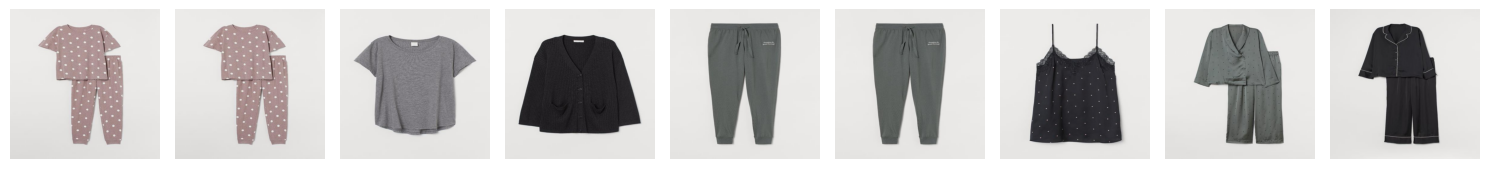

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Locate the row with the desired customer_id
selected_row = data.loc[data['customer_id'] == desired_customer_id]

# Check if the customer_id exists in the DataFrame
if not selected_row.empty:
    list_shop = selected_row['article_id'].values
    num_images = len(list_shop)

    # Set up the subplot layout
    rows = 1
    cols = num_images

    # Create a figure and axis
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5))

    for j, elem in enumerate(list_shop):
        # Assuming elem is the file path of the image
        image_path = f'/content/content/selected_images_resize/0{int(elem)}.jpg'
        print(image_path)

        try:
            # Read the image using mpimg.imread
            img = mpimg.imread(image_path)

            # Display the image in the subplot
            axs[j].imshow(img)
            axs[j].axis('off')  # Turn off axis labels and ticks

            # If you need to perform further processing, you can do it here

        except Exception as e:
            print(f"Error loading image '{image_path}': {e}")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

else:
    print(f"No data found for customer_id: {desired_customer_id}")


/content/content/selected_images_resize/0923758001.jpg
/content/content/selected_images_resize/0923758001.jpg
/content/content/selected_images_resize/0778745010.jpg
/content/content/selected_images_resize/0778745010.jpg
/content/content/selected_images_resize/0870328003.jpg
/content/content/selected_images_resize/0870328003.jpg
/content/content/selected_images_resize/0805947006.jpg
/content/content/selected_images_resize/0805947006.jpg
/content/content/selected_images_resize/0935541001.jpg
/content/content/selected_images_resize/0935541001.jpg
/content/content/selected_images_resize/0904571001.jpg
/content/content/selected_images_resize/0904571001.jpg


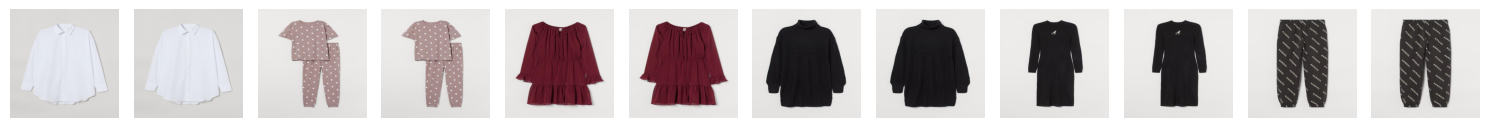

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Locate the row with the desired customer_id
selected_row = df_subset_grouped.loc[df_subset_grouped['customer_id'] == desired_customer_id]

# Check if the customer_id exists in the DataFrame
if not selected_row.empty:
    list_prediction = selected_row['prediction'].values[0]
    list_prediction_split = list_prediction.split(' ')
    num_images = len(list_prediction_split)

    # Set up the subplot layout
    rows = 1
    cols = num_images

    # Create a figure and axis
    fig, axs = plt.subplots(rows, cols, figsize=(15, 5))

    for j, elem in enumerate(list_prediction_split):
        # Assuming elem is the file path of the image
        image_path = f'/content/content/selected_images_resize/0{int(elem)}.jpg'
        print(image_path)

        try:
            # Read the image using mpimg.imread
            img = mpimg.imread(image_path)

            # Display the image in the subplot
            axs[j].imshow(img)
            axs[j].axis('off')  # Turn off axis labels and ticks

            # If you need to perform further processing, you can do it here

        except Exception as e:
            print(f"Error loading image '{image_path}': {e}")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

else:
    print(f"No data found for customer_id: {desired_customer_id}")
